# Analytic "dashboard" notebook to do some basic analysis on the song play data

In [1]:
import os
os.chdir('..')
import glob
import psycopg2
from psycopg2 import sql
import pandas as pd
from sql_queries import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = psycopg2.connect(dbstring) # dbstring defined at top of sql_queries.py
cur = conn.cursor()

### Explore the solution dataset (the songplays table) where the artist and song columns are complete

In [3]:
query =("SELECT * FROM songplays \
        WHERE song_id IS NOT NULL \
        OR artist_id IS NOT NULL;")
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
results = pd.DataFrame(cur.fetchall(), columns = colnames)
results

,songplay_id,start_time,user_id,level,song_id,artist_id,session_id,location,user_agent
0,4627,2018-11-21 21:56:47.796,15,paid,SOZCTXZ12AB0182364,AR5KOSW1187FB35FF4,818,"Chicago-Naperville-Elgin, IL-IN-WI","""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5..."


There is only ONE event from the songplays table with non-null song_id or artist_id. 
This is because there is only ONE NextSong event from the log data with a matching song/artist name
to the song data. Therefore, our solution table only has 1 complete row :(.

### To do more meaningful analysis of the songplay data, we will use the songplays_fill table. The song_id and artist_id columns have been replaced with the song and artist names directly from the log data

### What are the top artists from the sparkify data? What are the top artists for just the paid users?
### *Run this section twice to get the proper figure to display*    
Note: ignore the font warnings when plotting, they seem irrelevant!

C:\Users\ericr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ericr\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


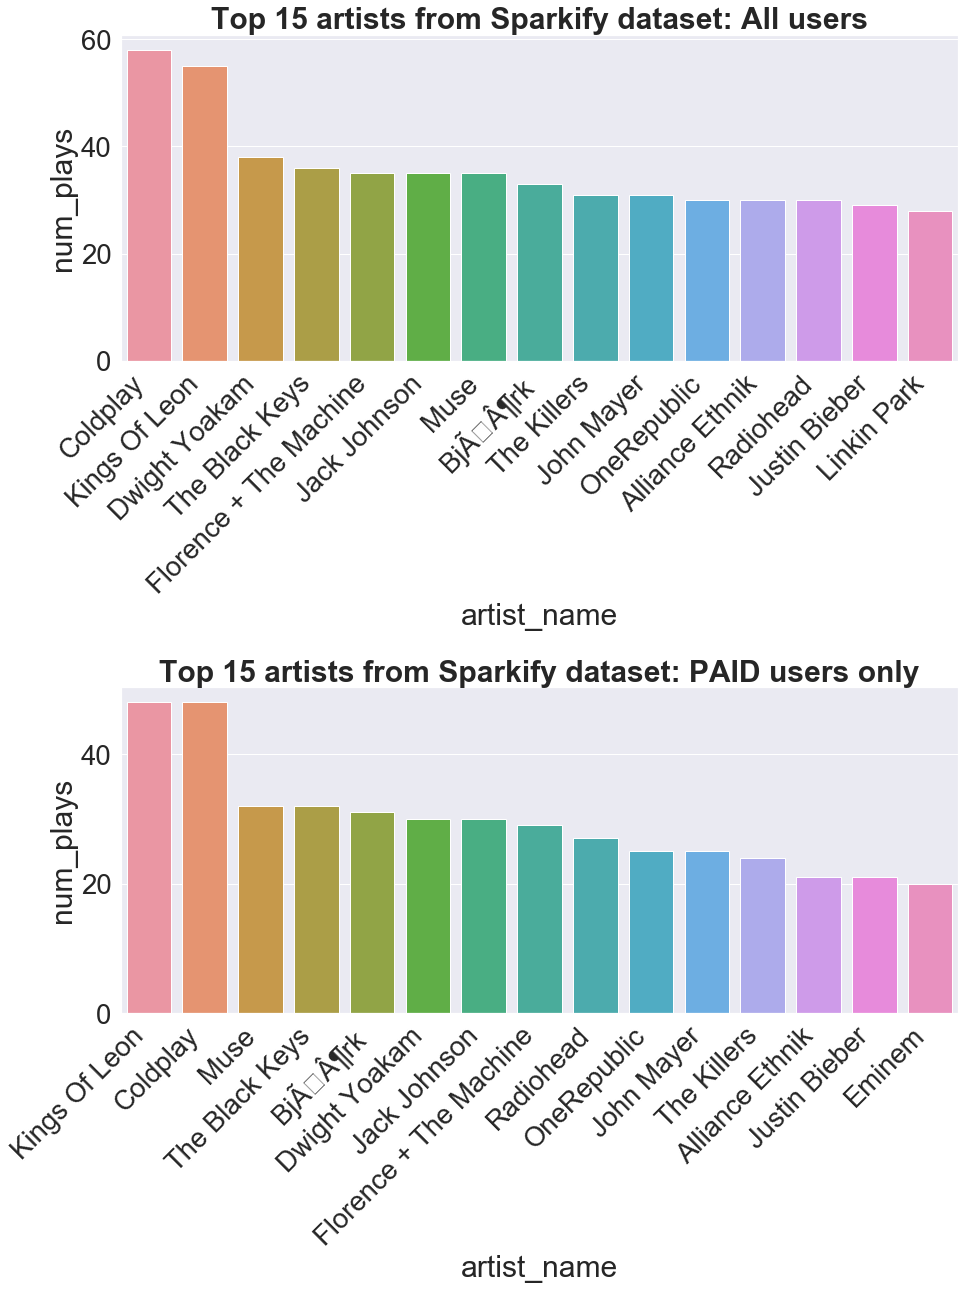

In [5]:
# Top artists for all users
query =("SELECT artist_name, COUNT(*) AS num_plays \
        FROM songplays_fill \
        GROUP BY 1 ORDER BY 2 DESC LIMIT 15;")
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
results1 = pd.DataFrame(cur.fetchall(), columns = colnames)

# Top artists just for paid users
query =("SELECT artist_name, COUNT(*) AS num_plays \
        FROM songplays_fill \
        WHERE level = 'paid' \
        GROUP BY 1 ORDER BY 2 DESC LIMIT 15;")
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
results2 = pd.DataFrame(cur.fetchall(), columns = colnames)

# Plot results as a Seaborn barplot (2 subplots)
fig, axes = plt.subplots(2, 1)
fig.subplots_adjust(hspace=1)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,18)})
sns.set(font_scale = 2.5)
chart1 = sns.barplot(x="artist_name", y="num_plays", data=results1, ax=axes[0]);
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, horizontalalignment='right');
chart1.set_title("Top 15 artists from Sparkify dataset: All users", weight = "bold");
chart2 = sns.barplot(x="artist_name", y="num_plays", data=results2, ax=axes[1]);
chart2.set_title("Top 15 artists from Sparkify dataset: PAID users only", weight = "bold");
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45, horizontalalignment='right');

### Findings:
- No major differences in the music interests between all users and paid users (same artists, just in slightly different orders)  
- Coldplay and Kings of Leon are the 2 most popular artists by a fairly significant margin. This suggests most of the users are rock enthusiasts.

### Suggestions to improve project:
- Ensure that there are **many** more song matches between the song data and the log data. It doesn't seem helpful to construct the songplays table with only 1 NON NULL row with song information.  
- Include some other fields such as song genre, and beats-per-minute, so we can do more in depth analysis of what users preferences are.

In [6]:
cur.close()
conn.close()